In [1]:
!apt-get install -y tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [2]:
import cv2
import numpy as np
import pytesseract
from google.colab.patches import cv2_imshow
from google.colab import files
import os

In [3]:
def process_image(img):
    gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    noise_free = cv2.fastNlMeansDenoising(gray_image)
    binary_thresh = cv2.threshold(noise_free, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
    return binary_thresh

In [4]:
def text_regions(image_data):
    detected_data = pytesseract.image_to_data(image_data, output_type=pytesseract.Output.DICT)
    return detected_data

In [5]:
def mark_text_regions(img, detected_boxes):
    output_img = img.copy()
    num_boxes = len(detected_boxes['level'])
    for i in range(num_boxes):
        if int(detected_boxes['conf'][i]) > 60:
            (x, y, width, height) = (detected_boxes['left'][i], detected_boxes['top'][i], detected_boxes['width'][i], detected_boxes['height'][i])
            cv2.rectangle(output_img, (x, y), (x + width, y + height), (0, 255, 0), 2)
    return output_img

In [6]:
def extract_text(detected_boxes):
    text_content = []
    num_boxes = len(detected_boxes['level'])
    for i in range(num_boxes):
        if int(detected_boxes['conf'][i]) > 60:
            text_content.append(detected_boxes['text'][i])
    return ' '.join(text_content)


Original Image:


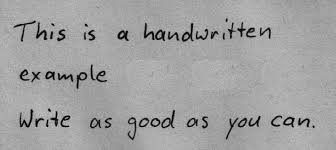


Image with Text Detection Regions:


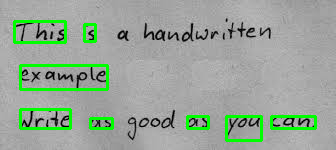


Detected Text:
This is example Wrie as as you Can,


In [9]:
img_path = "/content/Test_image_2.jpeg"

image_loaded = cv2.imread(img_path)

# Check if image was successfully loaded
if image_loaded is None:
    print(f"Error: Unable to read the image file: {img_path}")
else:
    # Display original image
    print("\nOriginal Image:")
    cv2_imshow(image_loaded)

    # Preprocess image
    preprocessed_image = process_image(image_loaded)

    # Detect text regions
    text_boxes = text_regions(preprocessed_image)

    # Draw bounding boxes on the original image
    image_with_boxes = mark_text_regions(image_loaded, text_boxes)

    # Display the image with detected text regions
    print("\nImage with Text Detection Regions:")
    cv2_imshow(image_with_boxes)

    # Extract and print detected text
    extracted_text = extract_text(text_boxes)
    print("\nDetected Text:")
    print(extracted_text)


Original Image:


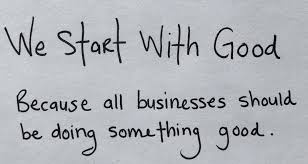


Image with Text Detection Regions:


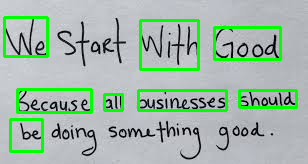


Detected Text:
\e With Good Gecause all businesses should be


In [10]:
img_path = "/content/Test_image_3.jpeg"

image_loaded = cv2.imread(img_path)

# Check if image was successfully loaded
if image_loaded is None:
    print(f"Error: Unable to read the image file: {img_path}")
else:
    # Display original image
    print("\nOriginal Image:")
    cv2_imshow(image_loaded)

    # Preprocess image
    preprocessed_image = process_image(image_loaded)

    # Detect text regions
    text_boxes = text_regions(preprocessed_image)

    # Draw bounding boxes on the original image
    image_with_boxes = mark_text_regions(image_loaded, text_boxes)

    # Display the image with detected text regions
    print("\nImage with Text Detection Regions:")
    cv2_imshow(image_with_boxes)

    # Extract and print detected text
    extracted_text = extract_text(text_boxes)
    print("\nDetected Text:")
    print(extracted_text)


Original Image:


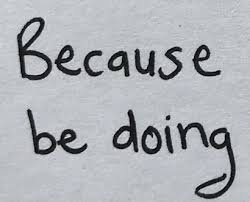


Image with Text Detection Regions:


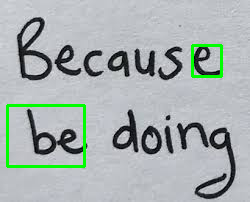


Detected Text:
& be


In [11]:
img_path = "/content/Test_image_1.jpeg"

image_loaded = cv2.imread(img_path)

# Check if image was successfully loaded
if image_loaded is None:
    print(f"Error: Unable to read the image file: {img_path}")
else:
    # Display original image
    print("\nOriginal Image:")
    cv2_imshow(image_loaded)

    # Preprocess image
    preprocessed_image = process_image(image_loaded)

    # Detect text regions
    text_boxes = text_regions(preprocessed_image)

    # Draw bounding boxes on the original image
    image_with_boxes = mark_text_regions(image_loaded, text_boxes)

    # Display the image with detected text regions
    print("\nImage with Text Detection Regions:")
    cv2_imshow(image_with_boxes)

    # Extract and print detected text
    extracted_text = extract_text(text_boxes)
    print("\nDetected Text:")
    print(extracted_text)